In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("/Company_data.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [6]:
x = data['TV'].values
y = data['Sales'].values

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
x_train.shape,x_test.shape

((150, 1), (50, 1))

In [25]:
reg = Lasso(alpha=0.1)
reg.fit(x_train,y_train)

Lasso(alpha=0.1)

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred1 = reg.predict(x_train)
print(f'Performance Of The Model On Training Data:\n')
print(f'MAE:{mean_absolute_error(y_train,y_pred1)}')
print(f'MSE:{mean_squared_error(y_train,y_pred1)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train,y_pred1))}')
print(f'R2SCORE:{r2_score(y_train,y_pred1)}')



Performance Of The Model On Training Data:

MAE:1.8204188646711517
MSE:5.136152679124108
RMSE:2.2663081606710302
R2SCORE:0.8111945012632855


In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred2 = reg.predict(x_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 1.8651204685513858
MSE = 5.513490556908362
RMSE = 2.3480823147641914
R_2 = 0.7971825651783787


In [34]:
reg.score(x_test, y_test)


0.7971825651783787

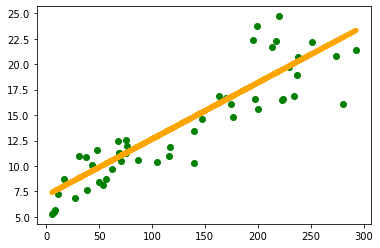

In [36]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,y_pred2,color='orange',linewidth=5)
plt.show()

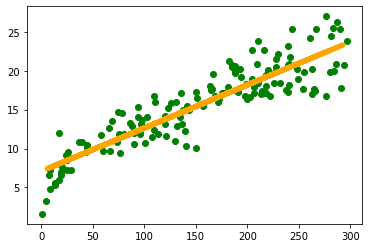

In [35]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_test,y_pred2,color='orange',linewidth=5)
plt.show()